## Исследование данных о российском кинопрокате



### Описание проекта

Заказчик исследования — Министерство культуры Российской Федерации. Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке российского кинопроката.  Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры РФ. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

#### Описание данных:

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма;
- `box_office` — сборы в рублях.


Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

###  Откроем файлы с данными каждой из таблиц и объединим их в один датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
        </div>
    </div>
</div>

#### Изучим общую информацию о данных таблицы `mkrf_movies.csv`

In [ ]:
# импортируем необходимые для работы библиотеки и выведем 10 первых строк таблицы mkrf_movies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

mkrf_movies.head(10)

#pd.options.mode.chained_assignment = None 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [ ]:
# получим общую информацию о данных исходной таблицы mkrf_movies, применив к ней метод info():
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

#### Изучим общую информацию о данных таблицы `mkrf_shows.csv`

In [ ]:
# уберем вывод чисел научным обозначением
pd.options.display.float_format = '{:.2f}'.format

# выведем 10 первых строк таблицы mkrf_movies
try:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

mkrf_shows.head(10)

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79
5,111000119,4293649.51
6,111000212,200.00
7,111000216,355567.00
8,111000313,710.00
9,111000314,1607970.00


In [ ]:
# получим общую информацию о данных исходной таблицы mkrf_movies, применив к ней метод info():
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


#### Объединим таблицы `mkrf_movies` и `mkrf_shows` в одну методом `merge()`, по колонке `puNumber`.

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.  Обратим внимание, что тип данных в столбце `puNumber` различается у исходных датафреймов. В таблице таблицы `mkrf_movies` - это тип данных `object`, когда в `mkrf_shows` - это `int64`. Найдем строки `mkrf_movies` в которых присутствуют нецифровые символы применив логическую фильтрацию.

In [ ]:
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Можно предположить, что в строке 804 присутствуют пробелы. Для их удаления используем метод `strip()`. В строке 1787 значение "нет" заменим нулевым значением. Приведем эти строки к целым числам функцией `to_numeric()`. После замены проверим ещё раз тип данных столбца `puNumber` методом `dtype`.

In [ ]:
# обращаемся к нужным строкам методом loc
mkrf_movies.loc[804, 'puNumber'] = mkrf_movies.loc[804, 'puNumber'].strip()
mkrf_movies.loc[1797, 'puNumber'] = '0'

mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])
mkrf_movies['puNumber'].dtype


dtype('int64')

#### Убедившись что тип данных в обоих датафреймах совпадает, добавим в датафрейм с фильмами сведения о показах.

In [ ]:
# слияние таблиц по 'puNumber', 'puNumber' таблицы mkrf_movies включены в итоговую таблицу df
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

# создадим резервную копию
df_raw = df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:** Мы видим что все 3158 значений `box_office` были присоединены без потерь. Продолжим работу с данными.

## Предобработка данных

### Проверка типов данных в датасете `df` и последующая замена

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо. Из пункта 1.2.4 мы видим что столбец `show_start_date` имеет тип объекта, и не является нужным нам типом даты `datetime` для последующего извлечения дня и месяца. Значения столбца `ratings` не являются целочисленными значениями. Преобразуем тип данных в выбранных столбцах следующим образом:

- `show_start_date` - тип данных object заменим на datetime. Для работы со временем необходимо привести данные в формат `datetime`, это позволит нам получать интересующие нас параметры в будущем.
- `ratings` - `object` заменим на `float64`. Так как рейтинг на Кинопоиске проходит по 10-балльной шкале, где 1 — это ужас, а 10 — шедевр. Также посмотрим уникальные значения рейтинга для проверки если есть значения включающие в себя не только цифры и точку.
- `puNumber` - приведем название данного столбца к нижнему регистру.

#### Столбец `show_start_date`

In [ ]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['show_start_date'].dtype

datetime64[ns, UTC]

#### Столбец `ratings`

In [ ]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Часть данных представлена в формате процентов, но для рейтингов Кинопоиска официально используют десятибальную систему. Выведем фильмы с рейтингом представленных в процентах.

In [ ]:
# создадим список где значения рейтинга представлена в процентах
unk_ratings = ['99%', '28%', '97%','83%', '64%',
                  '91%', '94%', '62%', '79%', '90%',
                  '19%', '88%', '89%', '98%']

In [ ]:
# используем фильтрацию при помощи метода query и сортируем по возрастанию рейтинга
df.query('ratings in @unk_ratings').sort_values(by='ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,19%,комедия,37960.00
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1740.00
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",528732557.70
7159,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00+00:00,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,79%,драма,182882.50
2680,Год Белого Слона,111003915,2015-04-08 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,79%,семейный,NaN
3446,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00+00:00,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,2266408.00
5455,Вечный холод,111006417,2017-08-28 12:00:00+00:00,Художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,"фэнтези,боевик,триллер",NaN
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1429859.00
5332,Добыча.,121009411,2011-06-15 12:00:00+00:00,Художественный,Афтер Дарк Филмз,США,Патрик Сиверсен,"Закари Ти Брайан, Кристофер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,88%,"фантастика,боевик,триллер",NaN


После ручного поиска данных фильмов на сайте Кинопоиска (https://www.kinopoisk.ru/) можно заметить, что на момент формирования данных для них было недостаточно оценок, рейтинг формируется. Заменим значения рейтингов данных картин на NaN и преобразуем значения в тип данных с плавающей точкой методом `to_numeric`.

In [ ]:
# находим строки где значения рейтингов представлены в процентах
df.loc[df['ratings'].isin(unk_ratings), 'ratings'] = np.nan

In [ ]:
df['ratings'] = pd.to_numeric(df['ratings'])

In [ ]:
# проверим замененные значения
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

#### Столбец `puNumber`

In [ ]:
# приведем данный столбец к нижнему регистру.
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   punumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод:** Изначально некоторые типы данных в столбцах не соответствовали правильным типам. Мы привели данные к нужным нам для дальнейшей работы типам данных, используя несколько классических инструментов для предобработки. Также исправили стиль столбца `puNumber` с помощью применения нижнего регистра.

### Изучаем пропуски в датафрейме

#### Найдем и изучим пропущенные значения в столбцах, отсортировав значения по убыванию, и визуализируем долю пропусков по столбцам нашего датасета.

In [ ]:
df.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
ratings                   996
genres                    976
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
punumber                    0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

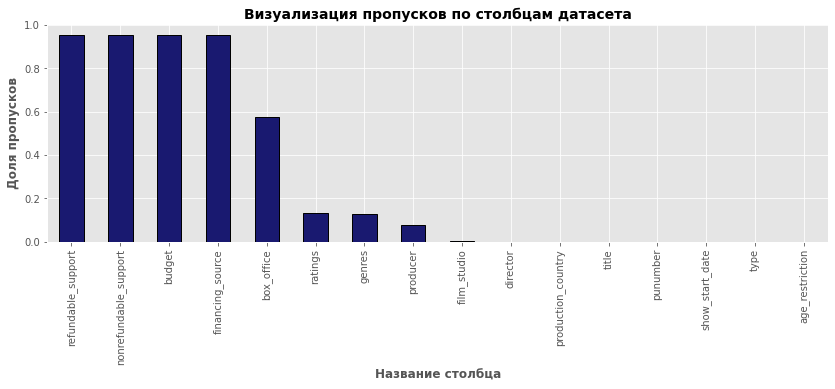

In [ ]:
# используем удобный для визуалиции стиль и настроим параметры сетки, цвета и размера шрифта
plt.style.use('ggplot')

# среднее пропущенных значений с сортировкой по убыванию
df.isna().mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(14,4), 
    grid=True, color='midnightblue', 
    edgecolor='black', linewidth=1,
)
plt.title('Визуализация пропусков по столбцам датасета',fontsize=14, fontweight="bold")
plt.xlabel('Название столбца',fontweight="bold")
plt.ylabel('Доля пропусков', fontweight="bold")
plt.show()

#### Столбцы `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`

In [ ]:
print('Доля пропусков по столбцу "budget": {:.2%}'.format(df['budget'].isna().mean()))

Доля пропусков по столбцу "budget": 95.57%


Пропущена значительная часть данных в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. В описании данных **п. 1.1.1** указано, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Замену пропусков или их удаление производить не будем, т.к. доля пропусков по этим столбцам велика и приведет к искажению при анализе данных. Можем предположить, что пропуски в данных вызваны тем, что большинство фильмов нашего датасета не получило государственной поддержки. Это могли быть как картины производства России так и зарубежных стран.

#### Столбец `box_office`

Данные значений `box_office` были получены из другой таблицы, которая содержала сведения о показах лишь определенных фильмов в российских кинотеатрах и имела количество 3158 значений. Соответственно, не все фильмы нашего датасета будут иметь сведения о сборах. Оставим пропущенные значения без каких-либо изменений.

#### Столбец `ratings`

In [ ]:
print('Доля пропусков по столбцу "ratings": {:.2%}'.format(df['ratings'].isna().mean()))

Доля пропусков по столбцу "ratings": 13.30%


In [ ]:
df.loc[df['ratings'].isna() == True].sample(8)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1219,Жорж Бизе. Кармен /По мотивам одноименной нове...,126003812,2012-12-28 12:00:00+00:00,Прочие,Опус Арт,Великобритания,Франческа Замбелло,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5429,Я - Филип,121014517,2017-08-01 12:00:00+00:00,Художественный,ОКИО Студио,Франция,Пьер Зандрович,Антуан Кайрол,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,Петр Ильич Чайковский. Щелкунчик 3D /По мотива...,126003712,2012-12-17 12:00:00+00:00,Прочие,"МортуСкрин, ЕвроАртс Мьюзик Интернэшнл энд Мар...",Великобритания,хореография Василия Вайнонена. Андреас Морелл,"Йан Бремм, Бернд Хелтхалер, Элмар Швинн",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6134,БУНКЕР-42. КАПСУЛА ВРЕМЕНИ,112005418,2018-08-16 12:00:00+00:00,Документальный,"ООО ""Киноконтест""",Россия,Е.Белова,В.Арцруни,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,Модест Петрович Мусоргский. Хованщина. Постано...,126004414,2014-10-29 12:00:00+00:00,Прочие,Райзинг Алтернатив,Германия,Дмитрий Черняков,Бернард Флейсхер,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6639,Брови,111000719,2019-03-01 12:00:00+00:00,Художественный,NaN,Россия,О.Штром,"В.Максимов, В.Степанов, Г.Киракосян, О.Штром",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


После ручного поиска фильмов с пропущенными значениями в рейтингах на сайте Кинопоиска (https://www.kinopoisk.ru/) можно предположить, что на момент формирования наших исходных данных для фильмов было недостаточное количество оценок, и тем самым рейтинг находился в процессе формирования. Исходя из информации  Кинопоиск начинает проставлять рейтинг фильмам, которые набрали более 100 оценок. Мы не можем каким-либо образом заменить пропущенные значения рейтингов, и удалять их не будем, так как доля пропусков существенна и может исказить наш анализ.

#### Столбец `genres`

In [ ]:
print('Доля пропусков по столбцу "genres": {:.2%}'.format(df['genres'].isna().mean()))

Доля пропусков по столбцу "genres": 13.04%


Данные категориальные значения будут использоваться нами для создания нового столбца, поэтому для удобства заменим пропуски в данных столбца `genre` на значения "unknown" методом fillna. При необходимости восстановить пропущенные значения можно было бы воспользовавшись ручным поиском по каждому фильму.

In [ ]:
df['genres'] = df['genres'].fillna(value='unknown')

#### Столбец `producer`

In [ ]:
print('Доля пропусков по столбцу "producer": {:.2%}'.format(df['producer'].isna().mean()))

Доля пропусков по столбцу "producer": 7.59%


Данные из указанного столбца не используются в нашем анализе. Нам не предстоит определять взаимосвязь между продюсером картины и каких-либо других характеристик, поэтому необходимости заменять пропущенные значения нет. При необходимости восстановить пропущенные значения можно было бы воспользовавшись ручным поиском по каждому фильму.

#### Столбец `director`

In [ ]:
print('Доля пропусков по столбцу "director": {:.2%}'.format(df['director'].isna().mean()))

Доля пропусков по столбцу "director": 0.12%


Доля пропусков минимальна. Нам предстоит последующая работа со значениями из данного столбца. Для удобства можем произвести замену пропущенных категориальных значений на "unknown" методом fillna. При необходимости восстановить пропущенные значения можно было бы воспользовавшись ручным поиском по каждому фильму.

In [ ]:
df['director'] = df['director'].fillna(value='unknown')

#### Столбец `film_studio`

In [ ]:
print('Доля пропусков по столбцу "film_studio": {:.2%}'.format(df['film_studio'].isna().mean()))

Доля пропусков по столбцу "film_studio": 0.24%


Доля пропусков минимальна. Данные из указанного столбца не используются в нашем анализе. Оставим пропуски без изменений

#### Столбец `production_country`

In [ ]:
df.loc[df['production_country'].isna() == True]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,unknown,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


В данном столбце всего 2 пропуска. После ручного поиска картины на сайте Кинопоиск, выясняем, что обе картины производства России. Зделаем необходимую замену.

In [ ]:
df.loc[df['production_country'].isna() == True, 'production_country'] = 'Россия'

In [ ]:
df.loc[[4441, 3186]]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,unknown,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00


**Вывод:** Было произведено исследование пропусков по всем столбцам и выдвинуты предложения замены пропусков там, где это могло быть необходимым и не повлияло бы на искажение исходных данных для последующего анализа. Построили для наглядности гистограмму с долями распределения пропусков. Пропуски могли быть вызваны либо отсутствием данных при вводе, также не исключен и человеческий фактор ошибок при вводе данных. 

### Изучим дубликаты в датафрейме

Проверим датафрейм на наличие явных дубликатов методом `duplicated()`

In [ ]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


#### Посмотрим на наличие дубликатов в столбце `title`

In [ ]:
# выведем первые 10 значений отсортировав по названию фильма
df[df['title'].duplicated(keep=False)].sort_values(by='title').head(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",18439240.55
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",750.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",NaN
4107,13.,221123710,2010-10-25 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN
4307,13.,121018110,2010-09-30 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN


Наличие дубликатов в данных названий фильмов может быть обусловлено тем, что у одного фильма может быть несколько прокатных удостоверений. Данная специфика была указана изначально в описании данных. Так один и тот же фильм могут начать показывать в разное время под разной лицензией и/или разными прокатчиками. Данные дубликаты удалять не стоит.

#### Посмотрим на наличие дубликатов в столбце `punumber`

In [ ]:
df[df['punumber'].duplicated(keep=False)]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Под одним номером прокатного удостоверения числятся два разных фильма с идентичной датой премьеры. Возможно сыграл человеческий фактор при заполнении данных. Номер прокатного удостоверения не имеет принципиального значения для нашего анализа, поэтому принимаем решение оставить эти дубликаты как есть.

#### Посмотрим на наличие неявных дубликатов в столбце `production_country`

In [ ]:
# для удобства визуализации выведем результат уникальных значений столбца списком
sorted(df['production_country'].unique().tolist())

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - 

In [ ]:
# получим длину списка по названиям картин
len(df['production_country'].unique())

950

In [ ]:
df[df['production_country'] == '2019']

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN


Мы видим, что в названиях стран присутствуют неявные дубликаты. Так некоторые названия стран-производителей разделены при помощи " - ", а другие при помощи " , ". Определим лямбда-функцию, которая уберет символ " - " как разделитель в строках с названиями стран-производителей и также уберет лишние пробелы в названиях. 
Заодно можно заметить, что имеется страна-производитель со значением "2019". Это явная ошибка при вводе данных. После ручного поиска картины "Дело Коллини" на сайте Кинопоиска, заменим данное значение на "Германия".

In [ ]:
# определим лямбда-функцию и применим ее методом apply с перезаписью датафрейма
df['production_country'] = df['production_country'].dropna().apply(lambda x: 
                                                                   ', '.join([x.strip() for x in x.split('-')]))

In [ ]:
df.loc[7247, 'production_country'] = 'Германия'

In [ ]:
sorted(df['production_country'].unique().tolist())

['CША',
 'Австралия',
 'Австралия, Великобритания',
 'Австралия, Великобритания, Бельгия, Индия',
 'Австралия, Германия',
 'Австралия, Ирландия',
 'Австралия, Канада',
 'Австралия, Колумбия',
 'Австралия, США',
 'Австралия, Турция, США',
 'Австрия',
 'Австрия, Великобритания, Германия',
 'Австрия, Германия',
 'Австрия, Германия, Франция',
 'Австрия, Люксембург',
 'Австрия, Франция, Германия',
 'Азербайджан, Россия',
 'Аргентина',
 'Аргентина, Бразилия',
 'Аргентина, Испания',
 'Аргентина, Испания, Уругвай',
 'Аргентина, Мексика, Бразилия, Франция, США',
 'Аргентина, Уругвай, Россия, Германия, Франция, Нидерланды',
 'Аргентина, Франция, Испания',
 'Армения',
 'Армения, Германия',
 'Армения, Казахстан',
 'Армения, Россия',
 'Бельгия',
 'Бельгия, Великобритания, США',
 'Бельгия, Германия, Канада, Франция, США, Великобритания',
 'Бельгия, Германия, Люксембург',
 'Бельгия, Германия, Люксембург, Франция',
 'Бельгия, Испания, Канада, Нидерланды',
 'Бельгия, Италия, Франция',
 'Бельгия, Канада

In [ ]:
# длина списка уникальных названий стран-производителей фильмов сократилась
len(df['production_country'].unique())

812

**Вывод:** Явных дубликатов в нашем датасете не было обнаружено. Есть дубликаты в названиях фильмов, но это может быть обусловлено тем, что у одного фильма может быть несколько прокатных удостоверений. Данная специфика была указана изначально в описании данных. Удалить дубликаты мы не можем, так как в этом случае утеряется номер прокатного удостоверения. Есть дубликаты в номерах прокатных удостоверений, это может быть связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Устранили неявные дубликаты в названиях стран-производителей с помощью функции, сократив тем самым количество дубликатов на 138 значений.

### Изучим категориальные значения

Для удобства визуализации выведем результаты для столбцов с категориальными значениями списком, отсортировав при этом значения в алфавитном порядке.

In [ ]:
sorted(df['age_restriction'].unique().tolist())

['«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет']

In [ ]:
sorted(df['type'].unique().tolist())

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [ ]:
sorted(df['genres'].unique().tolist())

['unknown',
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,

In [ ]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Мы замечаем как в столбце `type` есть несколько значений, у которых появился пробел в начале строки. Самый простой способ это исправить используя метод .str.strip(). Этот метод удалит все пробелы, которые встречаются в начале и в конце строки. Применим метод следующим образом: 

In [ ]:
df['type'] = df['type'].str.strip()
sorted(df['type'].unique().tolist())

['Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

**Вывод:** В столбце `type` были лишние пробелы, мы исправили это с помощью метода `str.strip()` . В пункте 2.3.3 мы также предобработали столбец `production_country` применив к строкам метод `strip()` избавивишись тем самым от дубликатов. Столбец `genres` оставим так как есть, так как нам предстоит извлечь первые значения из списка жанров в дальнейшем.

###  Проверим количественные значения

Проведем анализ количественных переменных нашего датасета, выделив столбцы с количественными значениями в отдельную переменную. Проанализируем фильмы, бюджет которых принимает нулевое значение. Несмотря на это можно заметить, что у некоторых фильмов с нулевым бюджетом сумма поддержки ненулевая. В этом случае бюджет не может быть меньше суммы поддержки, так как в описании данных сказано, что столбец budget уже включает в себя полный объём государственной поддержки. Если зайти на сайт Господдержки по фильмам ( https://ekinobilet.fond-kino.ru/government-support/ ) и посмотреть эти картины, можно увидеть что: "Данные не предоставлены правообладателем". Это могло стать причиной нулевого бюджета при наличии государственной поддержки.

In [ ]:
groups = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']
df[groups].describe().T

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.00,11864457.83,24916555.26,0.00,0.00,0.00,15000000.00,180000000.00
nonrefundable_support,332.00,48980988.89,59980117.92,0.00,25000000.00,30000000.00,40375000.00,400000000.00
budget,332.00,127229716.68,188588333.12,0.00,42000000.00,68649916.00,141985319.50,2305074303.00
box_office,3158.00,76478696.16,240353122.82,0.00,86239.00,2327987.55,23979671.02,3073568690.79
ratings,6490.00,6.48,1.10,1.00,5.90,6.60,7.20,9.20


In [ ]:
df[df['budget'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
punumber,17.00,112067204.47,1473501.27,111000415.00,111009615.00,111017315.00,114001715.00,114006518.00
refundable_support,17.00,16705882.35,20064784.78,0.00,0.00,10000000.00,20000000.00,60000000.00
nonrefundable_support,17.00,65174674.41,61236204.09,0.00,23000000.00,51000000.00,75000000.00,250000000.00
budget,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ratings,16.00,5.72,0.92,4.30,5.07,5.70,6.30,7.80
box_office,17.00,163137294.43,251115991.43,1334699.40,50451949.00,72937783.20,184487551.40,1038321489.00


In [ ]:
incorrect_budget = df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]
incorrect_budget.head(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


**Вывод:** Значений с данными аномалиями в данных немного - 17 штук. Попробуем заполнить значения нулевого бюджета установив зависимость общего бюджета от размера господдержки (суммы возвратных средств и невозвратных средств) и восстановим данные исходя из этого.

#### Подсчет средней доли господдержки в общем бюджете фильмов.

In [ ]:
df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df['support_percentage'] = df['support_percentage'].replace(np.inf, np.nan)

print('Средняя доля господдержки в общем бюджете фильма составляет:', df['support_percentage'].mean())

Средняя доля господдержки в общем бюджете фильма составляет: 0.517385819769894


In [ ]:
df.loc[incorrect_budget.index, 'budget'] = (df.loc[incorrect_budget.index, 'refundable_support'] + df.loc[incorrect_budget.index, 'nonrefundable_support']) / df['support_percentage'].mean()
df.loc[incorrect_budget.index].head(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,44454252.75,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,NaN
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,144959519.83,Фонд кино,6.60,драма,446163511.00,NaN
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,154623487.82,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,NaN
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,38655871.95,Фонд кино,6.20,"комедия,фэнтези",67418974.80,NaN
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,309246975.63,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,NaN
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,114034822.27,Фонд кино,6.30,"комедия,драма",1957738.51,NaN
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,67647775.92,Фонд кино,5.10,"комедия,мелодрама",72937783.20,NaN
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,11596761.59,Министерство культуры,4.30,комедия,15362931.43,NaN
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,135295551.84,Фонд кино,6.30,"комедия,мелодрама",70299052.00,NaN
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,483198399.43,Фонд кино,5.60,фантастика,1038321489.00,NaN


**Вывод:** Заметили аномалии в столбце `budget` у тех картин, где бюджет составлял 0 руб, несмотря на существующую возвратную и/или невозвратную господдержку которая исходя из описания данных должна была войти в сумму бюджета. Исходя из информации представленной на сайте Государственная поддержка фильмов, данные нулевые значения могут соответствовать случаям когда данные не предоставлены правообладателем. Мною было предложено заменить небольшое количество аномалий в нулевом бюджете, посчитав долю господдержки в общем бюджете каждого фильма по нашему датасету. Ручной поиск по бюджетам фильмов на сайте Кинопоиск показал что результаты такой замены могут быть близки к реальному.

### Добавим новые столбцы





#### Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [ ]:
# используем метод dt.year для формата дата-время
df['show_year'] = df['show_start_date'].dt.year
df.sample(5)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_year
7357,Леонардо. Вся история,126006419,2019-11-06 12:00:00+00:00,Документальный,Севенс Арт Продакшнс,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,1510714.08,NaN,2019
6741,Счастливого нового дня смерти,121002419,2019-02-28 12:00:00+00:00,Художественный,"Блюмхаус Продакшнз, Диджитал Райот Медиа",США,Кристофер Лэндон,"Джон Балдеччи, Джейсон Блум",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.20,"ужасы,фантастика,детектив",127365724.05,NaN,2019
491,Закон доблести,121008812,2012-04-10 12:00:00+00:00,Художественный,Бандито Бразерс,США,Майк МакКой,Такер Тули,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.60,"боевик,триллер,приключения",NaN,NaN,2012
6912,Велотачки,124002919,2019-05-02 12:00:00+00:00,Анимационный,Анимэйшн Байкс,Испания,Мануэль Х.Гарсиа,Ксимо Перес,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,unknown,3370796.50,NaN,2019
6871,Шторм: письма огня,121009119,2019-04-26 12:00:00+00:00,Художественный,"Фанта Фильм, Буллетпруф Кьюпид, Ирис Продакшнс...","Нидерланды, Бельгия, Люксембург",Деннис Ботс,"Харро ван Ставерден, Марина Блок, Кэтлин Гуссе...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2019


#### Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [ ]:
# определим собственную функцию
def first_word(df, columns):
    for col in columns:
        df[f'main_{col}'] = df[col].dropna().apply(lambda x: x.split(',')[0])
    return df

In [ ]:
# применим функцию к датафрейму и выведем 10 случайных строк для проверки
df = first_word(df, ['director', 'genres'])
df.sample(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_year,main_director,main_genres
7071,Коррупционер,121018819,2019-07-11 12:00:00+00:00,Художественный,"Моушн Пикчер Кэпитал, Креативити Кэпитал, Экли...",Великобритания,Рон Скальпелло,"Ник Бауэр, Эндрю Берг, Лор Вайссе",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.60,"триллер,драма,криминал",1490149.50,NaN,2019,Рон Скальпелло,триллер
3437,Девять жизней (2016),121023616,2016-08-16 12:00:00+00:00,Художественный,"Европа Корпорейшн, Фундаменталь Фильм","Франция, КНР",Барри Зонненфельд,"Лайза Эллзи, Кристоф Ламбер",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.20,"фэнтези,драма,комедия",62222504.74,NaN,2016,Барри Зонненфельд,фэнтези
3660,Служанка (2016),121021916,2016-07-27 12:00:00+00:00,Художественный,"Мохо Фильм, Йонг Фильм",Южная Корея,Чхан Ук Пак,"Чхан Ук Пак, Сид Лим",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.50,"мелодрама,триллер,история",11998709.88,NaN,2016,Чхан Ук Пак,мелодрама
5925,Лечение печали,111007918,2018-06-17 12:00:00+00:00,Художественный,ИП Воробьева Мария Владимировна,Россия,М.Воробьева,М.Воробьева,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2018,М.Воробьева,unknown
6484,Последняя милая Болгария,111023618,2019-06-01 12:00:00+00:00,Художественный,"ООО ""САГа""",Россия,А.Федорченко,"А.Савельев, А.Васильев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2019,А.Федорченко,unknown
4905,"Никита Кожемяка (проект ""Гора самоцветов"").",114000611,2011-08-24 12:00:00+00:00,Анимационный,"ООО ""Большая анимационная студия Пилот""",Россия,З.Трофимова,И.Гелашвили,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2011,З.Трофимова,unknown
1202,Ральф,124003012,2012-10-29 12:00:00+00:00,Анимационный,Уолт Дисней Анимейшн Студиос,США,Рич Мур,Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.80,"мультфильм,фэнтези,комедия",350.00,NaN,2012,Рич Мур,мультфильм
5296,The Prodigy - World's On Fire (Продиджи. Миры ...,126001411,2011-05-05 12:00:00+00:00,Прочие,Кукинг Винил,Великобритания,Пол Дугдейл,Вэрриорз Дэнс Фестиваль,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.60,ужасы,NaN,NaN,2011,Пол Дугдейл,ужасы
1460,Элитное общество,121017213,2013-07-03 12:00:00+00:00,Художественный,"Америкэн Зоэтроп, Патэ Дистрибусьон, Студио Ка...",США,София Коппола,"Роман Коппола, София Коппола",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.70,"драма,криминал,биография",2000.00,NaN,2013,София Коппола,драма
7131,Разум и искусство,126002819,2019-08-04 12:00:00+00:00,Прочие,Циркл Тайм,Великобритания,Амели Равалек,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,unknown,1524797.50,NaN,2019,Амели Равалек,unknown


#### Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
# долю господдержки вычислим как отношение суммы возвратных и невозвратных средств
# господдержки к общему бюджету; используем замену бесконечных значений на NaN из-за деления на ноль
df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df['support_percentage'] = df['support_percentage'].replace(np.inf, np.nan)

print('Средняя доля господдержки от общего бюджета фильма составляет:', df['support_percentage'].mean())

Средняя доля господдержки от общего бюджета фильма составляет: 0.5173858197698938


## Проведем исследовательский анализ данных


#### Построим сводную таблицу для значений проката фильмов по годам

Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [ ]:
# строим сводную таблицу для всех фильмов где известны данные о прокате
df_pivot = df.loc[df['box_office'].notna(), ['show_year', 'box_office']] \
                .groupby('show_year') \
                .agg(['count', 'sum', 'mean', 'median'])

# избавляемся от мультииндекса
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot.reset_index()

,show_year,count,sum,mean,median
0,2010,105,2428654.00,23130.04,1700.00
1,2011,109,14102765.00,129383.17,3000.00
2,2012,128,6955423.00,54339.24,5660.00
3,2013,184,29799706.20,161954.92,3522.50
4,2014,279,7444951859.20,26684415.27,18160.00
5,2015,465,39497365196.40,84940570.31,4920933.00
6,2016,526,47866299741.91,91000569.85,3846679.41
7,2017,357,48563707217.51,136032793.33,9968340.00
8,2018,475,49668403134.32,104565059.23,8891102.21
9,2019,530,48425708779.59,91369261.85,4627798.34


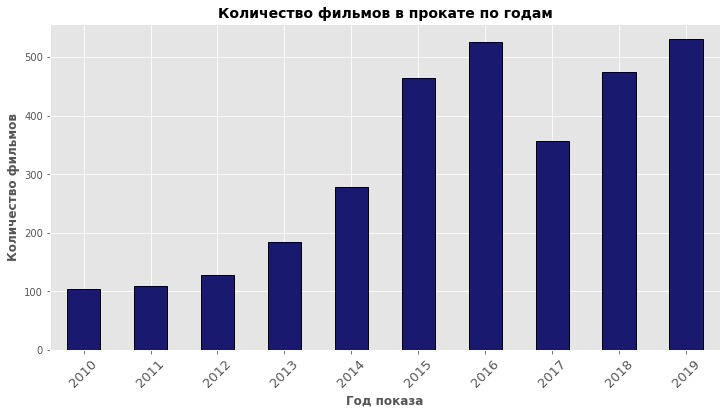

In [ ]:
# сгруппируем данные и визуализируем количество фильмов по годам
# используем удобный для визуалиции стиль и настроим параметры сетки, цвета и размера шрифта
plt.style.use('ggplot')

# среднее пропущенных значений с сортировкой по убыванию
df.groupby('show_year')['box_office'].count().plot(
    kind='bar', figsize=(12,6), 
    grid=True, color='midnightblue', 
    edgecolor='black', linewidth=1,
)
plt.title('Количество фильмов в прокате по годам',fontsize=14, fontweight="bold")
plt.xticks(rotation = 45, fontsize = 13)
plt.xlabel('Год показа',fontweight="bold")
plt.ylabel('Количество фильмов', fontweight="bold")
plt.show()

In [ ]:
# исключим значения NaN при подсчете доли
print(f'Доля фильмов с указанной информацией о прокате в кинотеатрах составляет: {df.box_office.notna().mean():.2f}')

Доля фильмов с указанной информацией о прокате в кинотеатрах составляет: 0.42


#### Изучим, как менялась динамика проката фильмов по годам. 

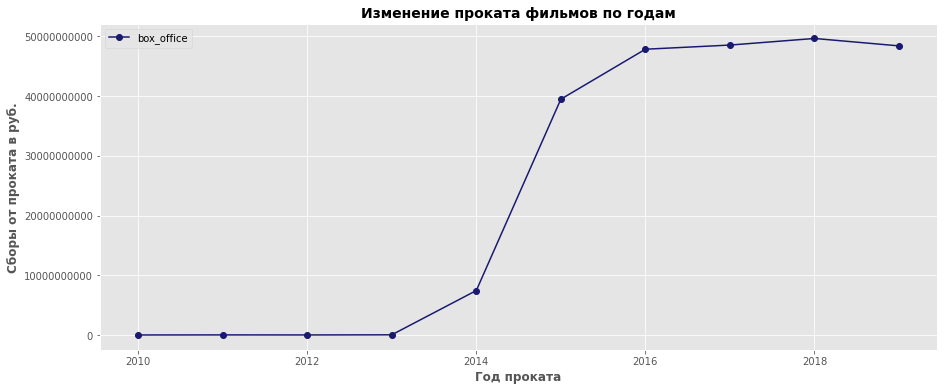

В 2010 году сумма сборов была минимальной, в 2018 максимальной.


In [ ]:
# сгруппируем данные по годам и применим суммирование вырученых средств от проката
# используем удобный для визуалиции стиль и настроим параметры сетки, цвета и размера шрифта
df.groupby('show_year')['box_office'].agg('sum').plot(
    x='year', style='o-', figsize=(15, 6), legend = True, color='midnightblue')

plt.ticklabel_format(style='plain')

plt.title('Изменение проката фильмов по годам', fontsize=14, fontweight="bold")
plt.xlabel('Год проката', fontweight="bold")
plt.ylabel('Сборы от проката в руб.', fontweight="bold" )
plt.show()

print(f"В {df_pivot['sum'].idxmin()} году сумма сборов была минимальной, в {df_pivot['sum'].idxmax()} максимальной.")

**Вывод:**  Учитывая сумму сборов по годам, из графика видим как максимум приходится на 2018 год. Года с 2010 по 2013 в расчет не берем, так как по ним меньше всего значений в данных. Будем считать что минимум сборов приходится на 2014 год. В России каждый год растет число кинотеатров и кинозалов, а вместе с ними — число новых релизов. Стимулировал этот рост также переход прокатчиков от пленки к цифровому показу, завершившийся в 2015 году.


#### С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

Данная таблица была построена выше в **п.2.7.1** Обратимся к ней.

In [ ]:
df_pivot[['mean','median']].reset_index()

,show_year,mean,median
0,2010,23130.04,1700.00
1,2011,129383.17,3000.00
2,2012,54339.24,5660.00
3,2013,161954.92,3522.50
4,2014,26684415.27,18160.00
5,2015,84940570.31,4920933.00
6,2016,91000569.85,3846679.41
7,2017,136032793.33,9968340.00
8,2018,104565059.23,8891102.21
9,2019,91369261.85,4627798.34


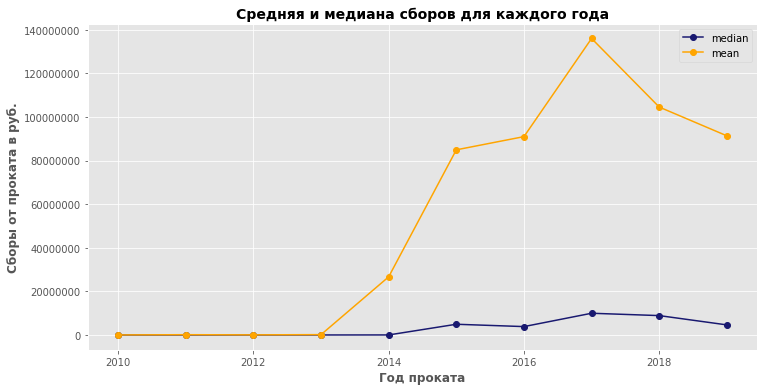

In [ ]:
# используем удобный для визуалиции стиль и настроим параметры сетки, цвета и размера шрифта
plt.style.use('ggplot')

df_pivot.plot(y=['median','mean'], style='-o', figsize=(12, 6), color=['midnightblue','orange'],legend = True)

plt.ticklabel_format(style='plain')

plt.title('Средняя и медиана сборов для каждого года', fontsize=14, fontweight="bold")
plt.xlabel('Год проката', fontweight="bold")
plt.ylabel('Сборы от проката в руб.', fontweight="bold" )
plt.show()

**Вывод:** Наблюдаем что для сборов каждого года очень большой разброс данных. Это можно заметить из разницы между средней и медианой. Это означает, что в данных присутствуют значения с очень большими сборами по сравнению с остальными. Для кино это нормальное явление. В среднем, самый прибыльный год может считаться 2017. Это видно и по медиане, и по средней.

#### Определим, влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

Посмотрим фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Менялась ли картина в зависимости от года? Если да, с чем это могло быть связано?

In [ ]:
# построим сводную таблицу отфильтровав значения методом query
df.query('show_year >= 2015').groupby('age_restriction')['box_office'].sum().round().to_frame().reset_index()

,age_restriction,box_office
0,«0+» - для любой зрительской аудитории,809077426.00
1,«12+» - для детей старше 12 лет,60619446628.00
2,«16+» - для детей старше 16 лет,76034733644.00
3,«18+» - запрещено для детей,40759615572.00
4,«6+» - для детей старше 6 лет,55798610800.00


**Вывод:** Из полученной сводной таблицы видим, что в период с 2015 по 2019 год больше всего кассовых сборов у фильмов категории «16+» - для детей старше 16 лет.

Посмотрим как менялась картина в зависимости от года c помощью сводной таблицы.

In [ ]:
# отфильтруем значения от 2015 года и позднее и сгруппируем данные по возрастной категории
df_age = df.query('2015 <= show_year').groupby(['show_year', 'age_restriction'])['box_office'] \
                             .agg('sum').reset_index()
df_age

,show_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,379054578.37
1,2015,«12+» - для детей старше 12 лет,13616082008.91
2,2015,«16+» - для детей старше 16 лет,11368120870.27
3,2015,«18+» - запрещено для детей,5432308367.44
4,2015,«6+» - для детей старше 6 лет,8701799371.41
5,2016,«0+» - для любой зрительской аудитории,150228848.67
6,2016,«12+» - для детей старше 12 лет,12204446524.39
7,2016,«16+» - для детей старше 16 лет,16664548541.74
8,2016,«18+» - запрещено для детей,6793929818.87
9,2016,«6+» - для детей старше 6 лет,12053146008.24


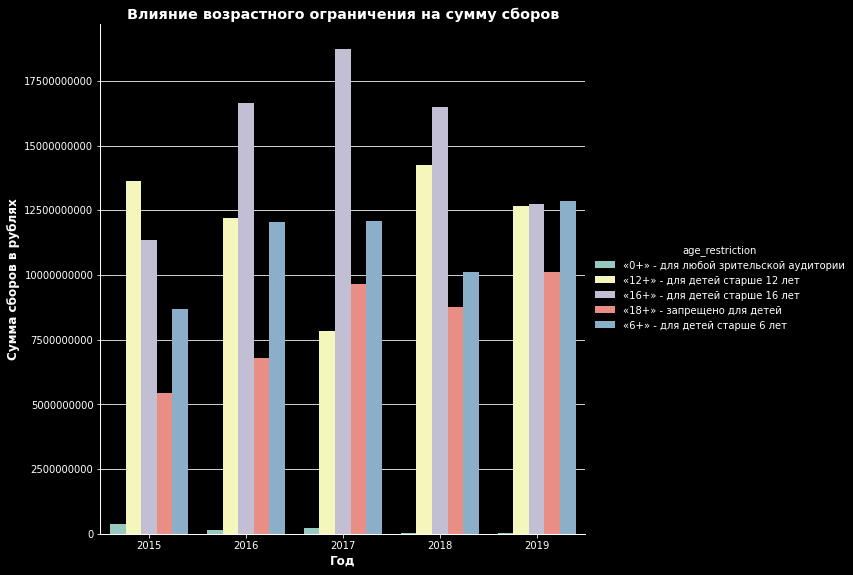

In [ ]:
# визуализируем данные с помощью столбчатых диаграмм по возрастным категориям
plt.style.use("dark_background")
sns.color_palette("Set2")

sns.catplot(x='show_year', y='box_office', hue='age_restriction', data=df_age, kind='bar', height=8);

plt.ticklabel_format(axis="y", style="plain")
plt.title('Влияние возрастного ограничения на сумму сборов', fontweight="bold");
plt.xlabel('Год', fontweight="bold");
plt.ylabel('Сумма сборов в рублях', fontweight="bold");

**Вывод:** После полученной визуализации мы наблюдаем что в 2016-2018 гг наибольшее количество сборов было получено от картин попадающих в возрастную категорию «16+» - для детей старше 16 лет, а в 2015 в лидерах оказалось кино 12+. В 2019 году динамика немного изменилась и все категории оказались примерно на одинаковом уровне. Можно предположить что у фильмов, рассчитанных на молодую аудиторию, возрастные ограничения могли сыграть важную роль и отразиться на сборах. И разница между "16+" и "18+" будет уже существенной. При этом возрастной рейтинг может сильно осложнить жизнь как прокатчикам, так и зрителям. Раз на раз не приходится, но во многих кинотеатрах, особенно в провинциях, распоряжения Минкульта соблюдаются крайне строго, и 11-летним детям, например, не продают билеты на «Доктора Стрэнджа», а родителей, пришедших на «Стражей Галактики» с 9-летними детьми заставляют у кассы писать расписку, дескать, они осознают, на что они ведут своего ребенка. Возможными причинами могут являться также изменения в законодательстве и поправки к возрастным ограничениям, которые принимались в период 2015-2019 гг.

### Исследуем фильмы, которые получили государственную поддержку.

#### Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [ ]:
# выделим фильмы как с наличием возвратной так и невозвратной суммы господдержки; сохраним в отдельную переменную
df_financed = df[df['budget'].isna() == False]
df_financed = df_financed.drop(['punumber', 'show_start_date', 'film_studio', 'production_country', 'director', 'producer','genres'], axis=1)
df_financed

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,support_percentage,show_year,main_director,main_genres
1281,Пока еще жива,Художественный,«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,365353.60,0.33,2013,А.Атанесян,драма
1448,Бесславные придурки,Художественный,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,28140.00,0.70,2014,А.Якимчук,unknown
1498,Невидимки,Художественный,«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,19957031.50,0.61,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,Художественный,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,55917.50,0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,Художественный,«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,232100.00,0.62,2014,М.Угаров,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,Художественный,«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,717703185.53,0.51,2019,А.Кравчук,история
7466,Иван Царевич и Серый Волк 4,Анимационный,«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,501069235.00,0.53,2019,Д.Шмидт,мультфильм
7474,Вторжение,Художественный,«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,NaN,0.53,2019,Ф.Бондарчук,фантастика
7476,Я свободен,Художественный,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,NaN,0.65,2019,И.Северов,драма


In [ ]:
# Создадим столбец с общей суммой государственной поддержки
df_financed['total_support'] = df_financed['refundable_support'] + df_financed['nonrefundable_support']

In [ ]:
# Создадим столбец окупаемости картины как разницу между кассовыми сборами и бюджетом фильма
df_financed['payback'] = df_financed['box_office'] - df_financed['budget']

In [ ]:
df_financed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  332 non-null    object 
 1   type                   332 non-null    object 
 2   age_restriction        332 non-null    object 
 3   refundable_support     332 non-null    float64
 4   nonrefundable_support  332 non-null    float64
 5   budget                 332 non-null    float64
 6   financing_source       332 non-null    object 
 7   ratings                314 non-null    float64
 8   box_office             318 non-null    float64
 9   support_percentage     332 non-null    float64
 10  show_year              332 non-null    int64  
 11  main_director          332 non-null    object 
 12  main_genres            332 non-null    object 
 13  total_support          332 non-null    float64
 14  payback                318 non-null    float64
dtypes:

#### Исследуем поведение окупаемости фильмов у которых была государственная поддержка

In [ ]:
df_financed.describe().T

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.00,11864457.83,24916555.26,0.00,0.00,0.00,15000000.00,180000000.00
nonrefundable_support,332.00,48980988.89,59980117.92,0.00,25000000.00,30000000.00,40375000.00,400000000.00
budget,332.00,135333300.03,188343992.03,11596761.59,46153971.75,75000067.50,151172048.25,2305074303.00
ratings,314.00,6.00,1.12,1.00,5.30,6.20,6.70,8.50
box_office,318.00,132432420.05,334837856.99,1550.00,1236675.50,15720067.71,106373008.27,3073568690.79
support_percentage,332.00,0.52,0.17,0.04,0.38,0.56,0.65,0.78
show_year,332.00,2016.72,1.64,2013.00,2015.00,2017.00,2018.00,2019.00
total_support,332.00,60845446.72,72755459.47,3000000.00,25333750.00,35000000.00,60000000.00,500000000.00
payback,318.00,-3657384.44,314572384.58,-1971477243.41,-73159279.50,-42585869.50,-11217966.87,2913568690.79


Проведя предварительную оценку, из столбца `support_percentage` который мы рассчитывали ранее в **п.2.5.1** можем заметить, что соотношение государственной поддержки к бюджету фильмов в среднем составляет 52%. Получается, что около половины бюджета картины финансируется государством. Как видно, в среднем на поддержку фильма выделалось 60,000,000 руб. При этом средняя окупаемость фильмов с государственной поддержкой имела отрицательное значение -139,747,188 руб, а 75% процентиль данных имел значение -70,968,828 руб. То есть в большинстве случаев, фильмы получившую государственную поддержку были убыточными. В подтверждение нашему исследованию можем привести данные из общедоступных статей 2019 года: https://www.proekt.media/research/fond-kino/, https://www.rbc.ru/technology_and_media/14/12/2019/5df2610f9a79476d48fb1685 где также говорится о малом количестве окупившихся фильмов которые получили финансирование от государства.

#### Построим график показывающий количество фильмов получивших государственную поддержку по годам.

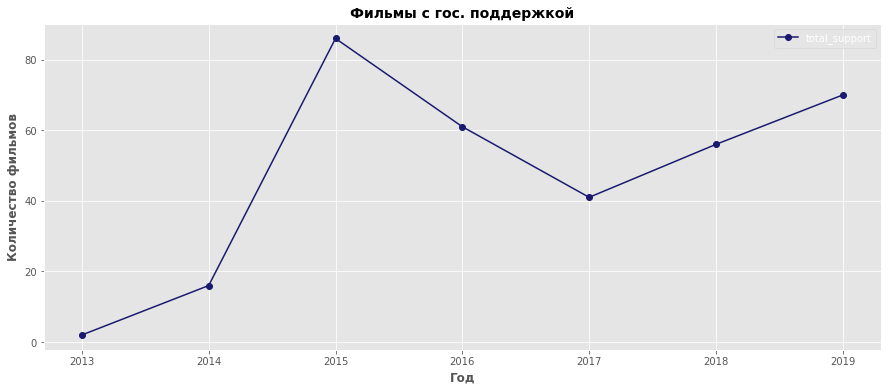

In [ ]:
plt.style.use('ggplot')

df_financed.groupby('show_year')['total_support'].count().plot(x='year', style='o-', figsize=(15, 6), legend = True, color='midnightblue');

plt.title('Фильмы с гос. поддержкой', fontsize=14, fontweight="bold", color='black');
plt.xlabel('Год', fontweight="bold");
plt.ylabel('Количество фильмов', fontweight="bold");


In [ ]:
df_financed.groupby('show_year')['total_support'].sum()

show_year
2013    134347945.00
2014    572002299.00
2015   3656241459.00
2016   4303155482.00
2017   3183971662.00
2018   3446969465.00
2019   4904000000.00
Name: total_support, dtype: float64

**Вывод:** Исходя из графика мы видим, что наибольшее количество фильмов получивших государственную поддержку пришлось на 2015 год. Далее по количеству господдержки следует 2019 год с рекордным финансированием фильмов в размере 4,9 млрд. руб.

#### Какие жанры фильмов оказались наиболее популярными при получении государственной поддержки?

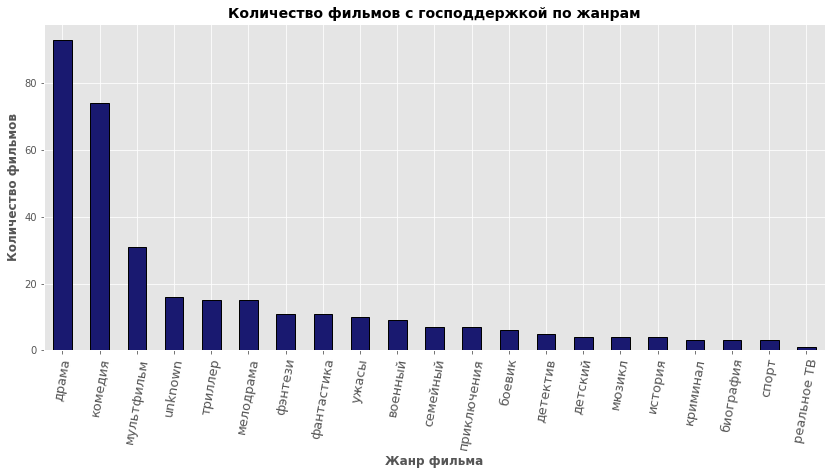

In [ ]:
# используем удобный для визуалиции стиль и настроим параметры сетки, цвета и размера шрифта
plt.style.use('ggplot')

df_financed['main_genres'].value_counts().plot(
    kind='bar', figsize=(14,6), 
    grid=True, color='midnightblue', 
    edgecolor='black', linewidth=1
)
plt.xticks(rotation = 80, fontsize = 13)
plt.title('Количество фильмов с господдержкой по жанрам',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Жанр фильма',fontweight="bold")
plt.ylabel('Количество фильмов', fontweight="bold")
plt.show()

**Вывод:** Можем заметить, что наиболее популярными жанрами среди фильмов получивших государственную поддержку в 2013-2019 годах являлись драмы, комедии и мультфильмы. А наименьшее количество поддержки от государства получали картины связанные с реальным телевидением и спортом.

#### Посмотрим окупаемость фильмов в зависимости от жанров

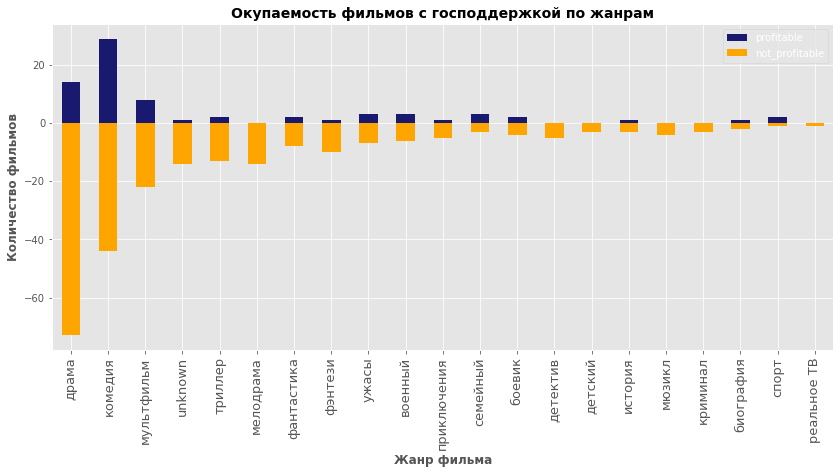

In [ ]:
# создадим стобцы которые будут отражать прибыльность фильмов
df_financed['profitable'] = df_financed['payback'] > 0
df_financed['not_profitable'] = df_financed['payback'] < 0

# сгруппируем данные и построим столбчатую диаграмму в обе стороны
df_financed.groupby('main_genres') \
            .agg({'title': 'count',
                  'profitable': 'sum',
                  'not_profitable': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(kind='bar', figsize=(14,6), 
                  grid=True, stacked=True, color=['midnightblue','orange'],
                  y=['profitable', 'not_profitable'])
plt.xticks(fontsize = 13)
plt.title('Окупаемость фильмов с господдержкой по жанрам',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Жанр фильма',fontweight="bold")
plt.ylabel('Количество фильмов', fontweight="bold")
plt.show()
pass

**Вывод:** Исходя из построенной столбчатой диаграммы видим что неприбыльных фильмов гораздо больше тех, что окупились (где кассовые сборы превышали общий бюджет в 2 раза). Это доказывает наше предположение о неокупаемости в п.3.1.2.

In [ ]:
df_financed.sample(5)

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,support_percentage,show_year,main_director,main_genres,total_support,payback,profitable,not_profitable
3482,Бременские разбойники,Анимационный,«6+» - для детей старше 6 лет,5000000.00,55000000.00,120000000.00,Фонд кино,3.20,34899699.18,0.50,2016,А.Лукьянчиков,мультфильм,60000000.00,-85100300.82,False,True
3515,Взломать блогеров,Художественный,«6+» - для детей старше 6 лет,0.00,25000000.00,36016269.00,Фонд кино,1.00,7323648.00,0.69,2016,М.Свешников,комедия,25000000.00,-28692621.00,False,True
1498,Невидимки,Художественный,«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,19957031.50,0.61,2013,Р.Давлетьяров,комедия,107847945.00,-156066458.50,False,True
2142,Территория,Художественный,«12+» - для детей старше 12 лет,30000000.00,30000000.00,500000000.00,Фонд кино,6.80,72578317.40,0.12,2015,А.Мельник,детектив,60000000.00,-427421682.60,False,True
3142,Тайна Снежной королевы,Художественный,«6+» - для детей старше 6 лет,20000000.00,5300000.00,215860000.00,"Министерство культуры, Фонд кино",7.20,1434072.50,0.12,2015,Н.Бондарчук,мюзикл,25300000.00,-214425927.50,False,True


#### Рейтинг фильмов и поиск зависимостей

Визуализируем рейтинг основных жанров фильмов и посмотрим какой жанр фильма лидиует по средней оценке рейтинга среди фильмов получивших государственную поддержку.

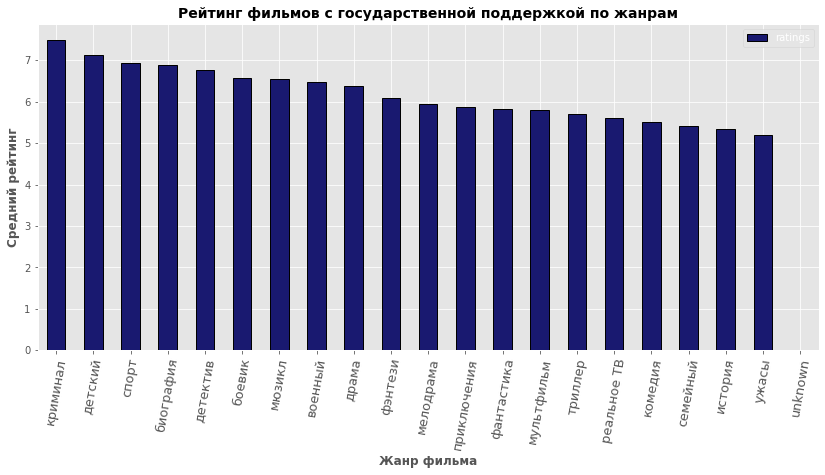

In [ ]:
# сгруппируем данные по основному жанру и посчитаем среднее рейтингов
df_financed[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(kind='bar', figsize=(14,6), 
    grid=True, color='midnightblue', 
    edgecolor='black', linewidth=1
)
plt.xticks(rotation = 80, fontsize = 13)
plt.title('Рейтинг фильмов с государственной поддержкой по жанрам',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Жанр фильма',fontweight="bold")
plt.ylabel('Средний рейтинг', fontweight="bold")
plt.show()

**Вывод:** К фильмам с наиболее высоким рейтингом можно отнести криминальные и детские картины. А наименее популярными будут являться фильмы ужасов.

#### Попробуем определить наличие линейной связи между величинами с помощью корреляции и последующей визуализации.

In [ ]:
# посмотрим корреляцию для выбранных численных значений нашего датафрейма
df_financed[['total_support','budget','ratings','box_office','support_percentage','payback']].corr()

,total_support,budget,ratings,box_office,support_percentage,payback
total_support,1.00,0.75,0.12,0.49,0.09,0.09
budget,0.75,1.00,0.10,0.38,-0.29,-0.18
ratings,0.12,0.10,1.00,0.16,-0.02,0.10
box_office,0.49,0.38,0.16,1.00,-0.12,0.84
support_percentage,0.09,-0.29,-0.02,-0.12,1.00,0.06
payback,0.09,-0.18,0.10,0.84,0.06,1.00


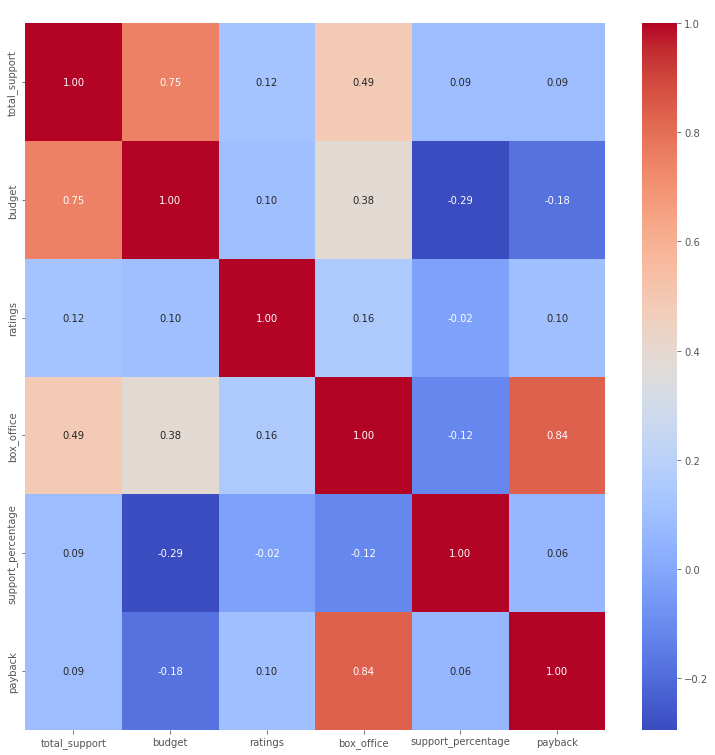

In [ ]:
# построим тепловую карту, коэффициенты корреляции окгруглим до 2 знаков
plt.figure(figsize=(13,13))
sns.heatmap(df_financed[['total_support','budget','ratings','box_office','support_percentage','payback']]. \
            corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

**Вывод:** Изучив взаимосвязь нескольких величин с помощью хитмэпа, видим что положительный коэффициент корреляции Пирсона указывает на сильное влияние общей государственной поддержки к бюджету фильмов. Это вполне очевидно, ведь чем больше сумма поддержки, тем больше и общий бюджет. Зависимость суммы государственной поддержки и кассовых сборов от проката фильма на рейтинг фильма очень слабая (или нелинейная), поэтому утверждать что чем дороже фильм, тем выше у него оценка мы не можем. У остальных параметров коэффициэнт корреляции почти нулевой. Можно утверждать, что линейная связь слабая либо отсутствует вовсе. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, нелинейный характер. Поэтому коэффициент корреляции такую связь не берёт.

#### Зависимость рейтинга от суммы государственной поддержки

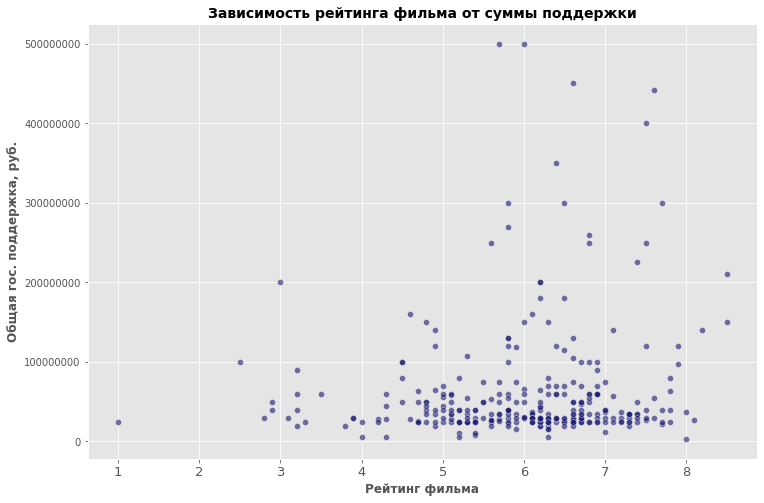

In [ ]:
# посмотрим диаграмму рассеивания настроив визуализацию
fig = plt.figure(figsize=(12, 8))

sns.scatterplot(x=df_financed["ratings"], y=df_financed["total_support"], alpha=0.6, color='midnightblue')

plt.ticklabel_format(axis="y", style="plain")
plt.xticks(fontsize = 13)
plt.title('Зависимость рейтинга фильма от суммы поддержки',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Рейтинг фильма',fontweight="bold")
plt.ylabel('Общая гос. поддержка, руб.', fontweight="bold")
plt.show()

**Вывод:** Из диаграммы рассеивания видим, что в нашей выборке преобладают картины с объемом государственной поддержки до 100 млн рублей. Фильмы с общей суммой поддержки более 200 млн рублей как правило не имели оценок ниже 5 баллов. Фильмы которые получали размер государственной поддержки более 300 миллионов рублей не имеют тенденции в повышении рейтингов. Какое-либо конкретное влияние суммы гос. поддержки на рейтинг фильма обнаружить не удалось. Из нашей диаграммы рассеивания можем найти подвтерждение п.3.1.7 (таблица корреляции), что от увеличения государственной поддержки фильма его рейтинг далеко не всегда линейно увеличивается. 

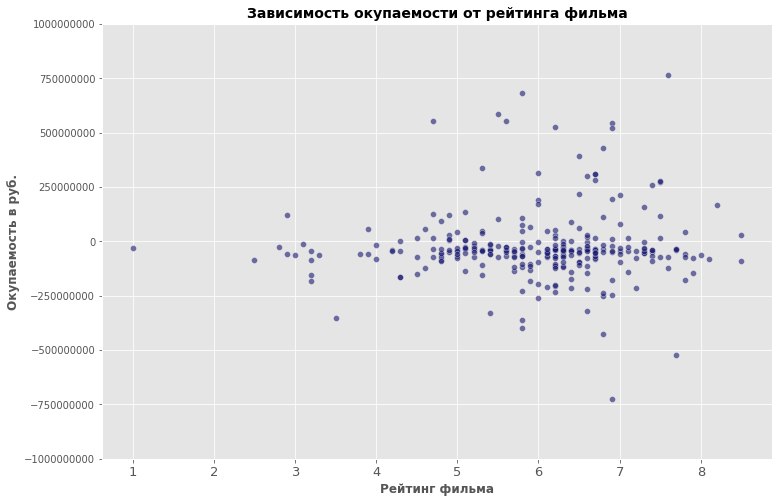

In [ ]:
# посмотрим диаграмму рассеивания настроив визуализацию
fig = plt.figure(figsize=(12, 8))

sns.scatterplot(x=df_financed["ratings"], y=df_financed["payback"], alpha=0.6, color='midnightblue')
plt.ylim(-1000000000, 1000000000);

plt.ticklabel_format(axis="y", style="plain")
plt.xticks(fontsize = 13)
plt.title('Зависимость окупаемости от рейтинга фильма',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Рейтинг фильма',fontweight="bold")
plt.ylabel('Окупаемость в руб.', fontweight="bold")
plt.show()

## Общий вывод по анализу данных

Мы произвели полную предварительную подготовку данных для анализа и выполнили поиск различных зависимостей между фильмами получивших государственную поддержку и другими известными параметрами. Были обработаны некоторые аномалии в данных. Так, в общем бюджете фильмов были нулевые значения, несмотря на то, что те фильмы получили возвратную или невозвратную гос. поддержку. Мы исправили это заполнив значения нулевого бюджета значением зависимости общего бюджета от размера господдержки (суммы возвратных средств и невозвратных средств). Для более точного анализа можно было порекомендовать ручной поиск фильмов и бюджета каждого из них на таких сайтах как Кинопоиск, Film.ru и пр. Выборка для нашего дальнейшего анализа фильмов только с гос. поддержкой составила чуть больше 10% от начального датасета. Проанализировав данные и построив соответствующие графики мы увидели что соотношение государственной поддержки к бюджету фильмов в среднем составляет 52%. То есть, примерно половины бюджета картины финансировалась государством. В среднем на поддержку фильма выделалось 60,000,000 руб. При этом средняя окупаемость фильмов с государственной поддержкой имела отрицательное значение, а 75% процентиль наших данных имел значение -11,217,966 руб. То есть в большинстве случаев, фильмы получившую государственную поддержку все же были убыточными. В подтверждение нашему исследованию мы привели данные из общедоступных источников. Например ресурс РБК повествует: "По итогам одиннадцати месяцев 2019 года только один из восьми фильмов, получивших государственные субсидии, оказался коммерчески успешным. Вопросы к системе господдержки отечественного кино ранее появились у Счетной палаты". Интересный факт, для того чтобы фильм стал коммерчески успешным, ему необходимо собрать в прокате в два раза больше, чем на него было потрачено. Мы также выяснили что нет конкретной (линейной) зависимости окупаемоси фильма от его рейтинга или зависимости рейтинга фильма от суммы гос. поддержки. Встречаются как и хорошо окупившиеся кинофильмы при оценках рейтинга 5-6 баллов, так и крупные "провалы" с рейтингом более 7. Это объяснимо тем, что экономика кинопроизводства предполагает, что один успешный фильм окупает остальные девять неудачных, «поэтому то соотношение, которое мы видим на российском кинорынке, нормально для индустрии в целом». Другое дело, что эти девять неудачных принадлежат разным студиям, продюсерам, поэтому неизбежно будут победители и проигравшие.

Пользовался следующими источниками для проверки моих гипотез: 
- https://www.proekt.media/research/fond-kino/
- https://www.rbc.ru/technology_and_media/14/12/2019/5df2610f9a79476d48fb1685
- https://www.kinopoisk.ru/